In [1]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from models import MLP

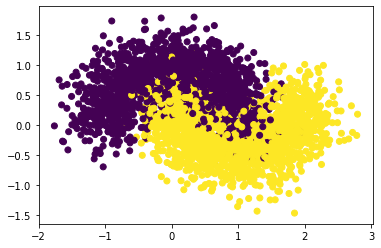

In [2]:
N = 3000
x, t = datasets.make_moons(N, noise=0.3)
plt.scatter(x[:, 0], x[:, 1], c=t)
plt.show()

t = t.reshape(N, 1)

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2)

In [3]:
model = MLP(2, 4, 1)

In [4]:
epochs = 100
batch_size = 30
n_batches = x_train.shape[0]//batch_size

for epoch in range(epochs):
    train_loss = 0
    x_, t_ = shuffle(x_train, t_train)
    
    for n_batch in range(n_batches):
        start = n_batch*batch_size
        end = start + batch_size
        
        train_loss += model.train_step(x_[start:end], t_[start:end])
    if epoch % 10 == 0 or epoch == epochs-1:
        print('epoch: {}, loss: {:.3f}'.format(epoch+1, train_loss))

epoch: 1, loss: 1082.069
epoch: 11, loss: 630.780
epoch: 21, loss: 533.316
epoch: 31, loss: 551.595
epoch: 41, loss: 542.452
epoch: 51, loss: 524.523
epoch: 61, loss: 529.803
epoch: 71, loss: 526.744
epoch: 81, loss: 534.057
epoch: 91, loss: 541.638
epoch: 100, loss: 517.168


In [5]:
preds = model(x_test) > 0.5
acc = accuracy_score(t_test, preds)
print('acc. : {:.3f}'.format(acc))

acc. : 0.928


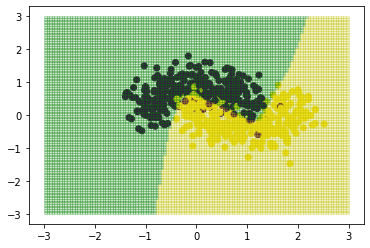

In [6]:
for i in range(120):
    for j in range(120):
        x_ = np.array([(i-60)*0.05, (j-60)*0.05])
        if model(x_) > 0.5:
            plt.fill([x_[0], x_[0], x_[0]+0.05, x_[0]+0.05], [x_[1], x_[1]+0.05, x_[1]+0.05, x_[1]],color="y",alpha=0.2)
        else:
             plt.fill([x_[0], x_[0], x_[0]+0.05, x_[0]+0.05], [x_[1], x_[1]+0.05, x_[1]+0.05, x_[1]],color="g",alpha=0.2)

plt.scatter(x_test[:, 0], x_test[:, 1], c=t_test.T[0])
plt.show()